In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/water_quality_dataset_100k_new.csv', index_col=0)

In [9]:
len(df)

100000

In [10]:
df['Target'].value_counts()

,count
Target,
0,69694
1,30306


In [11]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
3343584,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
4332797,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2580354,NaN,6.303493e-05,NaN,176.192348,NaN,0.896104,Near Colorless,0.122076,1.566183,0.058934,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
484305,7.782600,5.172140e-02,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,0.393710,...,4.195383,5.283502e-11,447.051626,NaN,13.009862,72.845282,May,13.0,1.0,0
1026518,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868170,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
468267,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
3189489,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0


In [12]:
df.isnull().sum()

,0
pH,2021
Iron,672
Nitrate,1796
Chloride,2955
Lead,429
Zinc,2561
Color,99
Turbidity,833
Fluoride,3216
Copper,3215


In [13]:
df.drop(columns=["Color", "Source", "Air Temperature", "Month", "Day", "Time of Day"], inplace=True)

In [14]:
df.dropna(axis = 0, inplace = True)

In [15]:
df.dtypes

,0
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Turbidity,float64
Fluoride,float64
Copper,float64
Odor,float64


In [16]:
df = df[["pH", "Turbidity", "Water Temperature", "Total Dissolved Solids", "Conductivity", "Chlorine", "Fluoride","Target"]]
df.dtypes

,0
pH,float64
Turbidity,float64
Water Temperature,float64
Total Dissolved Solids,float64
Conductivity,float64
Chlorine,float64
Fluoride,float64
Target,int64


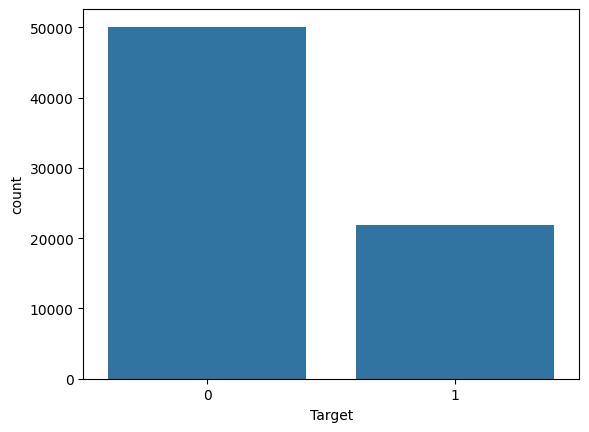

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = df["Target"])
plt.show()

In [18]:
X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8293
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4940
           1       0.73      0.73      0.73      2258

    accuracy                           0.83      7198
   macro avg       0.80      0.80      0.80      7198
weighted avg       0.83      0.83      0.83      7198



In [19]:
import pickle
from google.colab import files

# Save the trained model
with open("gbc_model.pkl", "wb") as f:
    pickle.dump(gbc, f)

# Download the model file
files.download("gbc_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8287
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4940
           1       0.73      0.73      0.73      2258

    accuracy                           0.83      7198
   macro avg       0.80      0.80      0.80      7198
weighted avg       0.83      0.83      0.83      7198



In [27]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_clf.fit(X_train, y_train)

# Predictions
y_pred = lgb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 19608, number of negative: 45168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 64776, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302705 -> initscore=-0.834451
[LightGBM] [Info] Start training from score -0.834451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain